In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [12]:
img1 = cv2.imread('im1.jpg')
img2 = cv2.imread('im2.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [13]:
print(img1.shape)
print(img2.shape)

(2336, 4160, 3)
(2336, 4160, 3)


In [14]:
img_1 = cv2.resize(img1,None,fx=0.3, fy=0.3, interpolation = cv2.INTER_CUBIC)
img_2 = cv2.resize(img2,None,fx=0.3, fy=0.3, interpolation = cv2.INTER_CUBIC)

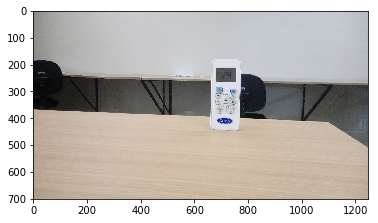

In [15]:
plt.imshow(img_1);

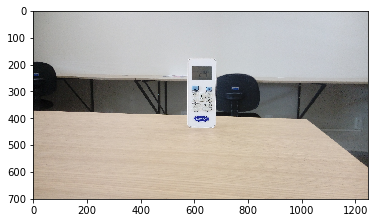

In [16]:
plt.imshow(img_2);

In [17]:
img_1.shape

(701, 1248, 3)

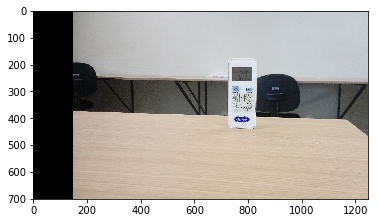

In [18]:
M = np.float32([[1,0,150],[0,1,2]])
rows,cols,_ = img_2.shape

dst = cv2.warpAffine(img_2,M,(cols,rows))
plt.imshow(dst);

In [21]:
def rmse(image1,image2,deslx,desly):
    
    im_1 = img_1[i:,j:,:]
    im_2 = img_2[:img_2.shape[0]-i,:img_2.shape[1]-j,:]
    #print(im_1.shape, im_2.shape)
    result = np.mean(np.power(im_1 - im_2,2))
   # print(result)
    return result
    

In [22]:
rows,cols,_ = img_2.shape
min_rmse = 100000000.
min_x = 0
min_y = 0
for i in range(img_2.shape[0]):
    for j in range(img_2.shape[1]):
        #M = np.float32([[1,0,j],[0,1,i]])

        #dst = cv2.warpAffine(img_2,M,(cols,rows))
        #plt.imshow(dst)
        result = rmse(img_1,img_2,j,i)
        if(result < min_rmse):
            min_rmse = result
            min_x = j
            min_y = i
            print(result)
        

41.05591447504786
40.827494689108356
40.56203512676609
40.18914956067733
39.8751603512361
39.51127244571502
39.15913850545536
38.84138234661891
38.51050918043348
38.191715436305486
37.81390075106184
37.39997870386494
36.97400923630443
36.62159475282082
36.208074672980096
35.81303270845843
35.34452637234378
34.89259241662041
34.694709068346036
34.63948901700736
34.618067333621426
34.5394075526056
34.50065097490872
34.495193389555226
34.49328023176121
34.48228077123178
34.45463267128446
34.43471264260536
34.40280570325897
34.39575807283269
34.38289529738387


KeyboardInterrupt: 

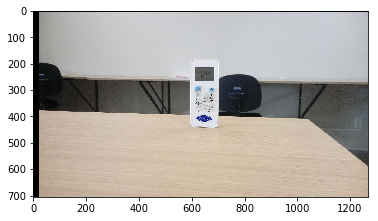

In [23]:
rows,cols,_ = img_2.shape

M = np.float32([[1,0,min_x],[0,1,min_y]])

dst = cv2.warpAffine(img_2,M,(cols+min_x,rows+min_y))


#dst[]
plt.imshow(dst);

In [25]:
min_y

4

In [30]:
dst.shape

(705, 1269, 3)

In [79]:
img_1.shape

(701, 1248, 3)

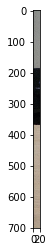

In [28]:
plt.imshow(img_1[:,:min_x])

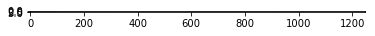

In [45]:
plt.imshow(img_1[:min_y,:])

In [46]:
diff_y = img_1[:min_y,:]
diff_x = img_1[:,:min_x]

In [48]:
dst[:min_y,:-min_x] = diff_y[:,:,:]
dst[:-min_y,:min_x] = diff_x[:,:,:]

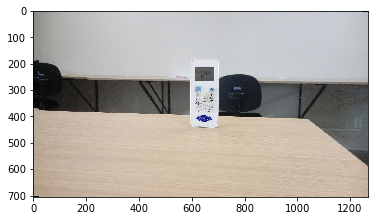

In [49]:
plt.imshow(dst);

In [51]:
print("image 1:", img_1.shape)
print("image 2:", img_2.shape)
print("final:", dst.shape)

image 1: (701, 1248, 3)
image 2: (701, 1248, 3)
final: (705, 1269, 3)
